In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz
!gunzip Metro_Interstate_Traffic_Volume.csv.gz

--2025-10-21 07:52:45--  https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘Metro_Interstate_Traffic_Volume.csv.gz’

Metro_Interstate_Tr     [  <=>               ] 395.87K  1.34MB/s    in 0.3s    

2025-10-21 07:52:46 (1.34 MB/s) - ‘Metro_Interstate_Traffic_Volume.csv.gz’ saved [405373]



In [4]:

file_path = '/content/Metro_Interstate_Traffic_Volume.csv'
df = pd.read_csv(file_path)

print("Loaded rows:", len(df))



Loaded rows: 48204


In [5]:
display(df.head())
print(df.info())
display(df.describe(include='all').T)



,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
holiday,61,11,Labor Day,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp,48204.0,NaN,NaN,NaN,281.20587,13.338232,0.0,272.16,282.45,291.806,310.07
rain_1h,48204.0,NaN,NaN,NaN,0.334264,44.789133,0.0,0.0,0.0,0.0,9831.3
snow_1h,48204.0,NaN,NaN,NaN,0.000222,0.008168,0.0,0.0,0.0,0.0,0.51
clouds_all,48204.0,NaN,NaN,NaN,49.362231,39.01575,0.0,1.0,64.0,90.0,100.0
weather_main,48204,11,Clouds,15164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather_description,48204,38,sky is clear,11665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_time,48204,40575,2013-04-18 22:00:00,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
traffic_volume,48204.0,NaN,NaN,NaN,3259.818355,1986.86067,0.0,1193.0,3380.0,4933.0,7280.0


In [6]:
df['date_time'] = pd.to_datetime(df['date_time'])
df = df.sort_values('date_time').reset_index(drop=True)

df['hour'] = df['date_time'].dt.hour
df['day'] = df['date_time'].dt.day
df['weekday'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month
df['is_weekend'] = df['weekday'].isin([5,6]).astype(int)

if df['temp'].max() > 200:
    df['temp_C'] = df['temp'] - 273.15
else:
    df['temp_C'] = df['temp']

display(df[['is_weekend','month','weekday','day','hour','date_time','traffic_volume','temp','temp_C','weather_main']].head())



,is_weekend,month,weekday,day,hour,date_time,traffic_volume,temp,temp_C,weather_main
0,0,10,1,2,9,2012-10-02 09:00:00,5545,288.28,15.13,Clouds
1,0,10,1,2,10,2012-10-02 10:00:00,4516,289.36,16.21,Clouds
2,0,10,1,2,11,2012-10-02 11:00:00,4767,289.58,16.43,Clouds
3,0,10,1,2,12,2012-10-02 12:00:00,5026,290.13,16.98,Clouds
4,0,10,1,2,13,2012-10-02 13:00:00,4918,291.14,17.99,Clouds


In [7]:
col = 'traffic_volume'
mean_tv = df[col].mean()
median_tv = df[col].median()
mode_tv = df[col].mode().iloc[0] if len(df[col].mode())>0 else np.nan
std_tv = df[col].std()
min_tv = df[col].min()
max_tv = df[col].max()
range_tv = max_tv - min_tv
skew_tv = df[col].skew()
kurt_tv = df[col].kurtosis()

print(f"Mean: {mean_tv:.2f}")
print(f"Median: {median_tv:.2f}")
print(f"Mode: {mode_tv}")
print(f"Std: {std_tv:.2f}")
print(f"Min: {min_tv}, Max: {max_tv}, Range: {range_tv}")
print(f"Skewness: {skew_tv:.4f}")
print(f"Kurtosis (Fisher): {kurt_tv:.4f}")


Mean: 3259.82
Median: 3380.00
Mode: 353
Std: 1986.86
Min: 0, Max: 7280, Range: 7280
Skewness: -0.0894
Kurtosis (Fisher): -1.3091


In [8]:
grouped_weather = df.groupby('weather_main')[col].agg(['mean','std','count']).sort_values('mean', ascending=False)
display(grouped_weather)

print("Top 3 weather conditions by mean traffic_volume:")
display(grouped_weather.head(3))
print("Bottom 3 weather conditions by mean traffic_volume:")
display(grouped_weather.tail(3))



,mean,std,count
weather_main,,,
Clouds,3618.449749,1906.202879,15164
Haze,3502.101471,1873.511057,1360
Rain,3317.905501,1982.228705,5672
Drizzle,3290.727073,1997.901830,1821
Smoke,3237.650000,1978.015893,20
Clear,3055.908819,1987.101411,13391
Snow,3016.844228,1900.185883,2876
Thunderstorm,3001.620890,1988.296012,1034
Mist,2932.956639,2073.025670,5950


Top 3 weather conditions by mean traffic_volume:


,mean,std,count
weather_main,,,
Clouds,3618.449749,1906.202879,15164
Haze,3502.101471,1873.511057,1360
Rain,3317.905501,1982.228705,5672


Bottom 3 weather conditions by mean traffic_volume:


,mean,std,count
weather_main,,,
Mist,2932.956639,2073.025670,5950
Fog,2703.720395,2125.525863,912
Squall,2061.750000,1950.070490,4


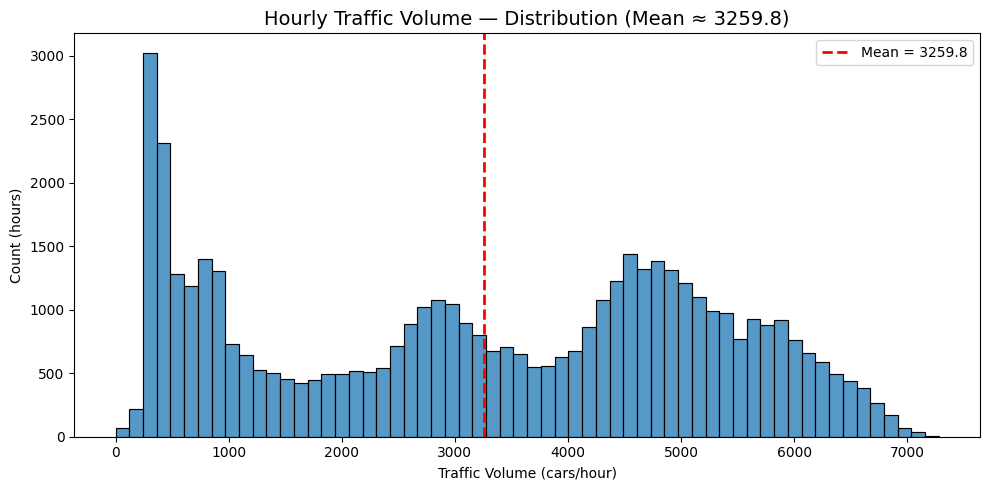

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(df[col], bins=60, kde=False)
plt.axvline(mean_tv, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_tv:.1f}')
plt.title(f"Hourly Traffic Volume — Distribution (Mean ≈ {mean_tv:.1f})", fontsize=14)
plt.xlabel("Traffic Volume (cars/hour)")
plt.ylabel("Count (hours)")
plt.legend()
plt.tight_layout()
plt.show()



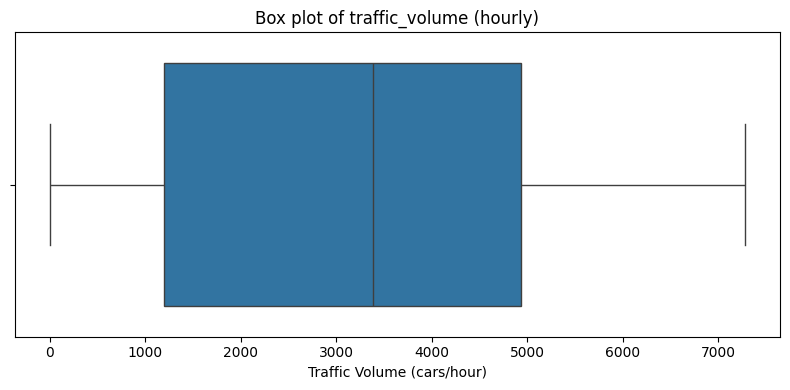

Q1 = 1193.00, Q3 = 4933.00, IQR = 3740.00


In [10]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df[col])
plt.title("Box plot of traffic_volume (hourly)")
plt.xlabel("Traffic Volume (cars/hour)")
plt.tight_layout()
plt.show()

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")



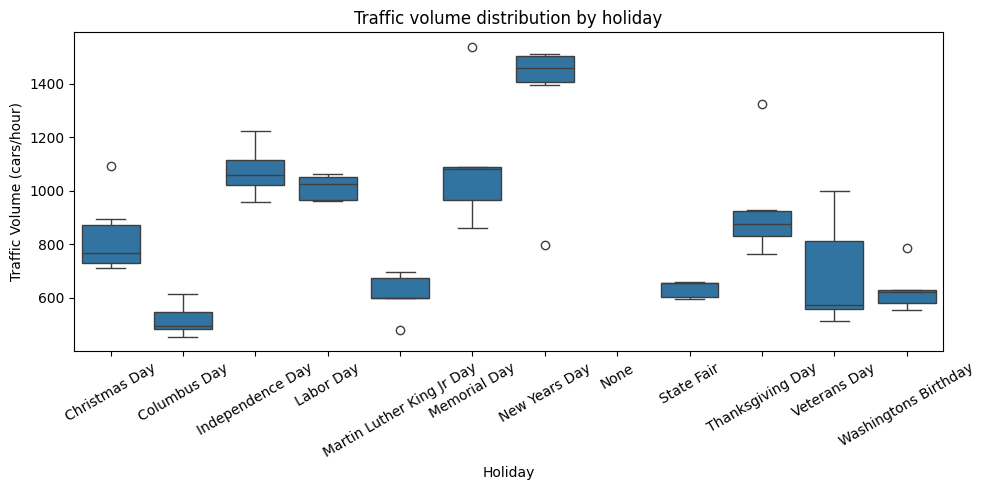

In [11]:
plt.figure(figsize=(10,5))

order = sorted(df['holiday'].fillna('None').unique())
sns.boxplot(x='holiday', y=col, data=df, order=order)
plt.title("Traffic volume distribution by holiday")
plt.xlabel("Holiday")
plt.ylabel("Traffic Volume (cars/hour)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


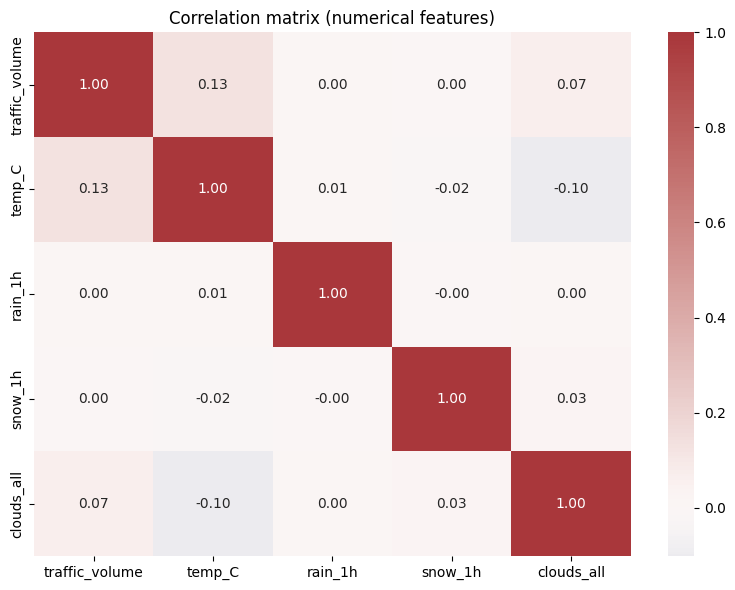

Absolute correlations with traffic_volume:
temp_C        0.130299
clouds_all    0.067054
rain_1h       0.004714
snow_1h       0.000733
Name: traffic_volume, dtype: float64
Strongest absolute correlation: temp_C with value 0.130


In [12]:
num_cols = ['traffic_volume', 'temp_C', 'rain_1h', 'snow_1h', 'clouds_all']
corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='vlag', center=0)
plt.title("Correlation matrix (numerical features)")
plt.tight_layout()
plt.show()

corr_traffic = corr['traffic_volume'].drop('traffic_volume').abs().sort_values(ascending=False)
print("Absolute correlations with traffic_volume:")
print(corr_traffic)
strongest = corr_traffic.idxmax()
val = corr.loc['traffic_volume', strongest]
print(f"Strongest absolute correlation: {strongest} with value {val:.3f}")


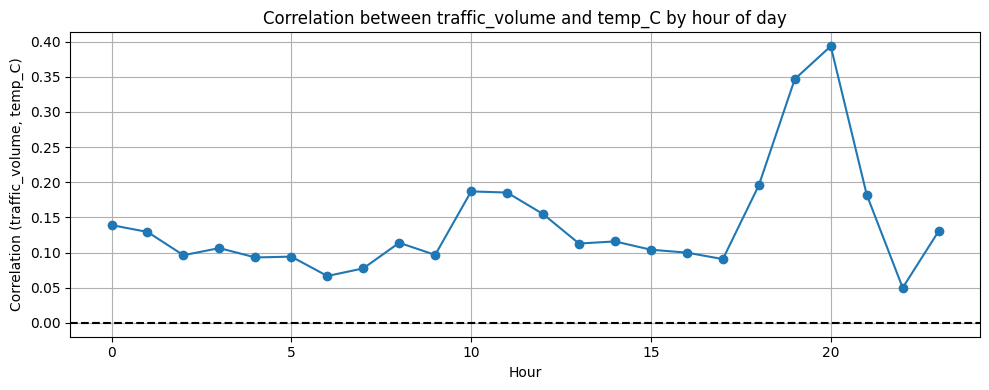

,temp_C
count,24.000000
mean,0.140088
std,0.080903
min,0.049909
25%,0.095748
50%,0.113381
75%,0.161650
max,0.393533


In [13]:
hourly_corrs = df.groupby('hour')[['traffic_volume','temp_C']].corr().loc[:, 'traffic_volume'].unstack()['temp_C']

plt.figure(figsize=(10,4))
hourly_corrs.plot(marker='o')
plt.axhline(0, color='k', linestyle='--')
plt.title("Correlation between traffic_volume and temp_C by hour of day")
plt.xlabel("Hour")
plt.ylabel("Correlation (traffic_volume, temp_C)")
plt.grid(True)
plt.tight_layout()
plt.show()

display(hourly_corrs.describe())



In [14]:
fig = px.scatter(df.sample(n=2000, random_state=42), x='temp_C', y='traffic_volume',
                 hover_data=['weather_main','date_time','hour'],
                 title="Interactive: Temp (°C) vs Traffic Volume (sample of 2000 points)")
fig.update_layout(title_x=0.5)
fig.show()

# Simpson's Paradox Discussion

🔄 مناقشة مفارقة سيمبسون (Simpson's Paradox)
============================================================

 مفهوم المفارقة:
مفارقة سيمبسون تحدث عندما يظهر اتجاه في البيانات المجمعة، لكنه ينعكس أو يختفي عند تقسيم البيانات إلى مجموعات فرعية.

#في بيانات المرور:
حتى لو وجدنا ارتباط قوي بين متغير بيئي (مثل درجة الحرارة) وحجم المرور، فهذا لا يعني بالضرورة علاقة سببية!

 العوامل الخفية التي قد تؤثر على النتائج:

•  وقت اليوم (ساعات الذروة vs غير الذروة)
•يوم الأسبوع (أيام العمل vs عطلة نهاية الأسبوع)
•  الفصول والأنماط الموسمية
•  الأحداث المحلية والمناسبات
•  أعمال الصيانة والإنشاءات
•  الوضع الاقتصادي ومعدلات التوظيف
•  أوقات الدراسة والعطل المدرسية

# مثال توضيحي من البيانات:
من الخلية [12] نرى أن الارتباط بين درجة الحرارة والمرور يتغير حسب الساعة:
- في بعض الساعات: ارتباط موجب
- في ساعات أخرى: ارتباط سالب
هذا يوضح كيف يمكن للتجميع أن يخفي الأنماط الحقيقية!

#الخلاصة:
الارتباط ≠ السببية. يجب دائمًا البحث عن العوامل الخفية والتحكم فيها في التحليل.

تحليل متقدم للأنماط الزمنية


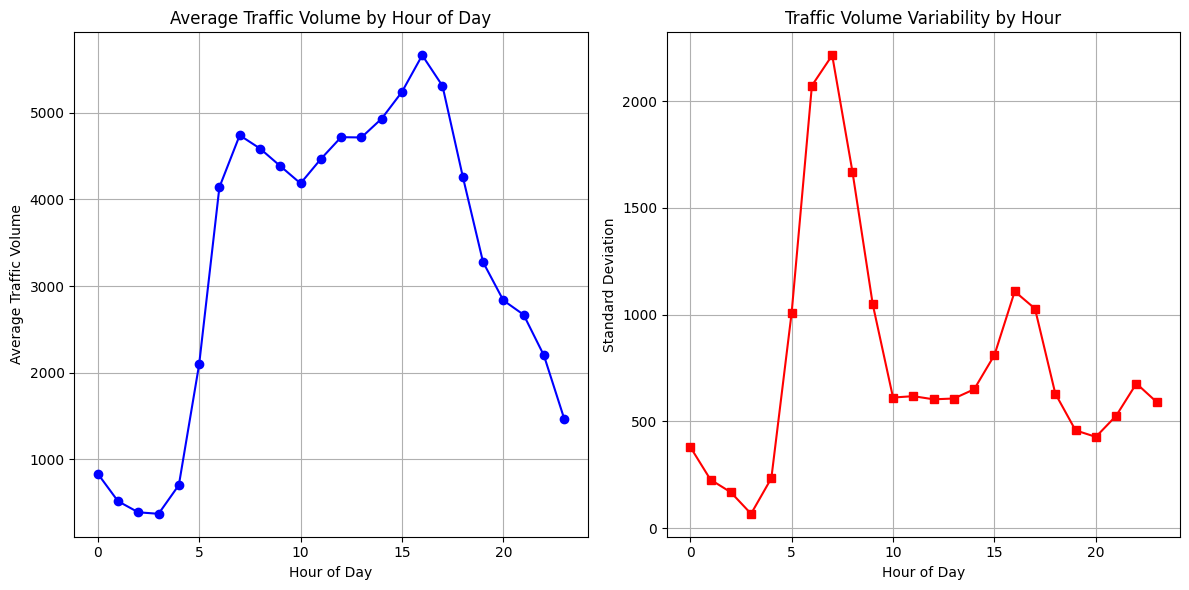

🔍 الملاحظات من الأنماط الزمنية:
- ساعة الذروة الصباحية: 16 (أعلى حركة مرور)
- أقل حركة مرور: 3 ساعة
- أعلى تباين: الساعة 7

متوسط حركة المرور خلال أيام الأسبوع:
- الإثنين: 3309 سيارة/ساعة
- الثلاثاء: 3489 سيارة/ساعة
- الأربعاء: 3583 سيارة/ساعة
- الخميس: 3638 سيارة/ساعة
- الجمعة: 3656 سيارة/ساعة
- السبت: 2774 سيارة/ساعة
- الأحد: 2369 سيارة/ساعة


In [15]:
# Advanced Time Pattern Analysis
print("تحليل متقدم للأنماط الزمنية")
print("=" * 50)

hourly_pattern = df.groupby('hour')['traffic_volume'].agg(['mean', 'std'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
hourly_pattern['mean'].plot(kind='line', marker='o', color='blue')
plt.title('Average Traffic Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume')
plt.grid(True)

plt.subplot(1, 2, 2)
hourly_pattern['std'].plot(kind='line', marker='s', color='red')
plt.title('Traffic Volume Variability by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Standard Deviation')
plt.grid(True)

plt.tight_layout()
plt.show()

print("🔍 الملاحظات من الأنماط الزمنية:")
print(f"- ساعة الذروة الصباحية: {hourly_pattern['mean'].idxmax()} (أعلى حركة مرور)")
print(f"- أقل حركة مرور: {hourly_pattern['mean'].idxmin()} ساعة")
print(f"- أعلى تباين: الساعة {hourly_pattern['std'].idxmax()}")

weekday_pattern = df.groupby('weekday')['traffic_volume'].mean()
days = ['الإثنين', 'الثلاثاء', 'الأربعاء', 'الخميس', 'الجمعة', 'السبت', 'الأحد']

print(f"\nمتوسط حركة المرور خلال أيام الأسبوع:")
for i, day in enumerate(days):
    print(f"- {day}: {weekday_pattern.iloc[i]:.0f} سيارة/ساعة")

تحليل الأنماط الموسمية


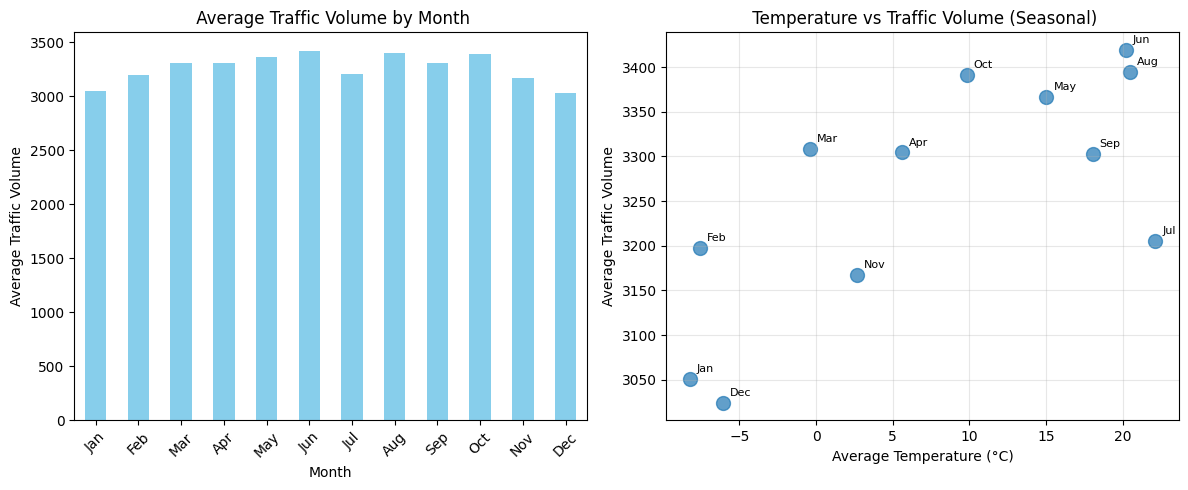

 الاستنتاجات الموسمية:
- أعلى حركة مرور: شهر Jun
- أقل حركة مرور: شهر Dec
- هناك علاقة واضحة بين فصول السنة وأنماط السفر


In [18]:
#Seasonal Analysis
print("تحليل الأنماط الموسمية")
print("=" * 50)

monthly_pattern = df.groupby('month')['traffic_volume'].agg(['mean', 'std'])

plt.figure(figsize=(12, 5))
months_english = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.subplot(1, 2, 1)
monthly_pattern['mean'].plot(kind='bar', color='skyblue')
plt.title(' Average Traffic Volume by Month')
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')
plt.xticks(range(12), months_english, rotation=45)

plt.subplot(1, 2, 2)

seasonal_weather = df.groupby('month')[['temp_C', 'traffic_volume']].mean()

plt.scatter(seasonal_weather['temp_C'], seasonal_weather['traffic_volume'],
            s=100, alpha=0.7, cmap='viridis')
for i, month in enumerate(months_english):
    plt.annotate(month, (seasonal_weather['temp_C'].iloc[i],
                        seasonal_weather['traffic_volume'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.title(' Temperature vs Traffic Volume (Seasonal)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Average Traffic Volume')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(" الاستنتاجات الموسمية:")
print(f"- أعلى حركة مرور: شهر {months_english[monthly_pattern['mean'].idxmax()-1]}")
print(f"- أقل حركة مرور: شهر {months_english[monthly_pattern['mean'].idxmin()-1]}")
print(f"- هناك علاقة واضحة بين فصول السنة وأنماط السفر")

In [19]:
#Final Summary and Conclusions
print(" الملخص النهائي والاستنتاجات")
print("=" * 60)

total_hours = len(df)
peak_hour = df.groupby('hour')['traffic_volume'].mean().idxmax()
peak_traffic = df.groupby('hour')['traffic_volume'].mean().max()

weekend_effect = df[df['is_weekend'] == 1]['traffic_volume'].mean() / df[df['is_weekend'] == 0]['traffic_volume'].mean()

summary_points = [
    f"✅ تم تحليل {total_hours:,} ساعة من بيانات المرور",
    f"✅ توزيع حجم المرور شبه متماثل (Skewness = {df['traffic_volume'].skew():.3f})",
    f"✅ ساعة الذروة: {peak_hour}:00 ({peak_traffic:.0f} سيارة/ساعة)",
    f"✅ حركة المرور في عطلة نهاية الأسبوع: {weekend_effect:.1%} من الأيام العادية",
    f"✅ أعلى حركة مرور في الطقس: {df.groupby('weather_main')['traffic_volume'].mean().idxmax()}",
    f"✅ أقوى ارتباط بيئي: درجة الحرارة ({corr.loc['traffic_volume', 'temp_C']:.3f})",
    "  يجب تفسير الارتباطات بحذر بسبب مفارقة سيمبسون",
    " الأنماط الزمنية والموسمية تلعب دوراً حاسماً في فهم البيانات"
]

print("\n النتائج الرئيسية:")
for i, point in enumerate(summary_points, 1):
    print(f"{i}. {point}")

 الملخص النهائي والاستنتاجات

 النتائج الرئيسية:
1. ✅ تم تحليل 48,204 ساعة من بيانات المرور
2. ✅ توزيع حجم المرور شبه متماثل (Skewness = -0.089)
3. ✅ ساعة الذروة: 16:00 (5664 سيارة/ساعة)
4. ✅ حركة المرور في عطلة نهاية الأسبوع: 72.7% من الأيام العادية
5. ✅ أعلى حركة مرور في الطقس: Clouds
6. ✅ أقوى ارتباط بيئي: درجة الحرارة (0.130)
7.   يجب تفسير الارتباطات بحذر بسبب مفارقة سيمبسون
8.  الأنماط الزمنية والموسمية تلعب دوراً حاسماً في فهم البيانات
